## Seaborn Categorical Plot Types

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action= "ignore")

In [3]:
df = sns.load_dataset("tips" )
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<AxesSubplot:xlabel='tip', ylabel='sex'>

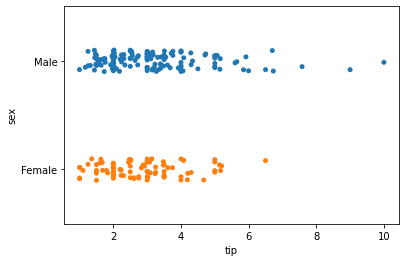

In [4]:
# stripplot 데이터셋의 모든 관측치를 보여준다 
sns.stripplot(data =df , y = "sex" , x = "tip", jitter = True)

<AxesSubplot:xlabel='tip', ylabel='sex'>

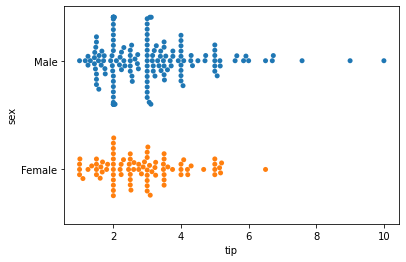

In [5]:
# swarmplot 관측치가 겹치지 않는 방식으로 데이터 배치 (큰 데이셋에는 유용하지 않는다.)
sns.swarmplot(data =df , y = "sex" , x = "tip")

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

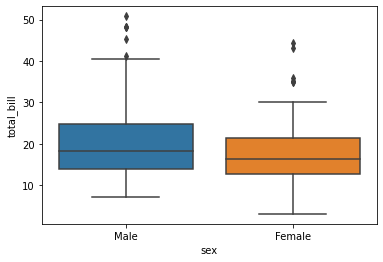

In [6]:
# boxplot 
sns.boxplot(data =df , y = "total_bill" , x = "sex")

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

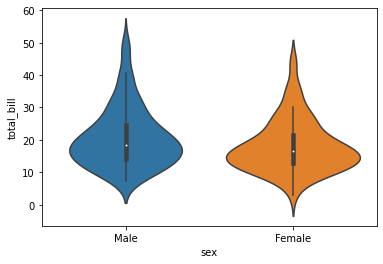

In [7]:
# violineplot 커널밀도 도표와 상자도표의 조합 
sns.violinplot(data =df , y = "total_bill" , x = "sex")

In [8]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:xlabel='tip', ylabel='smoker'>

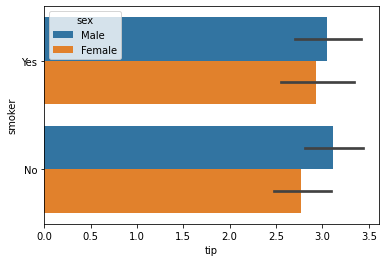

In [9]:
# 통계적 측정 barplot
sns.barplot(y= "smoker" ,x = "tip", data = df, hue = "sex")

<AxesSubplot:xlabel='tip', ylabel='day'>

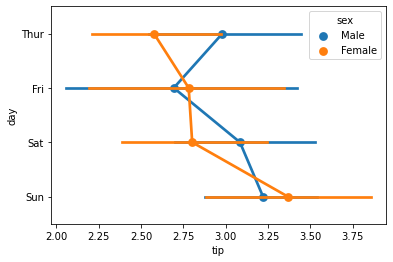

In [10]:
# pointplot은 요약층적 값과 신뢰구간을 표시한다는 점에서 barplot과 유사 , 범주형 값에서 값이 어떻게 변하는지 유용
sns.pointplot(y= "day" ,x = "tip", data = df, hue = "sex")

<AxesSubplot:xlabel='count', ylabel='time'>

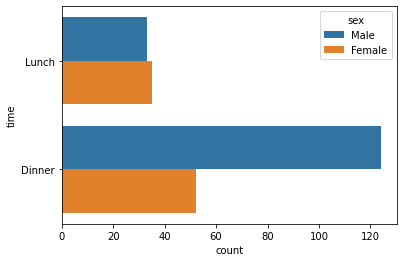

In [11]:
# countplot 각변수의 인스턴스 수를 표시 
sns.countplot(data = df , y = "time", hue ="sex")

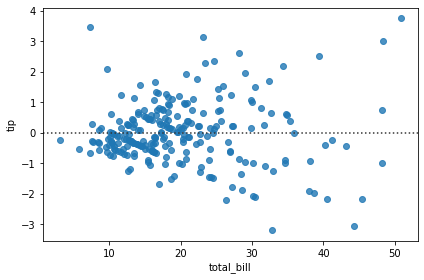

In [13]:
# residplot 잔차그림은 회귀모형의 적합성을 이해하는데 유용
sns.residplot(x = "total_bill" , y = "tip" , data = df )

plt.tight_layout()
plt.show()

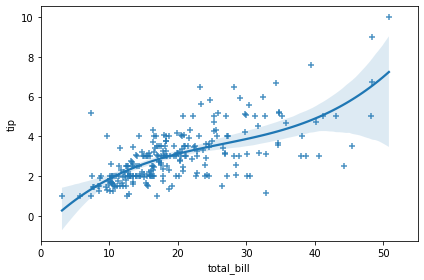

In [14]:
# seaborn의 regplot은 order 파라미터를 통해 numpy함수를 사용해 다항식 회귀선 가능 
sns.regplot(x = "total_bill" , y = "tip" , data = df , marker  = '+' ,order = 3) # order = 3는 3차 다항식 

plt.xlim(0,55)
plt.tight_layout()
plt.show()

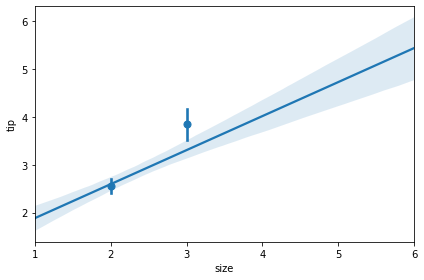

In [15]:
# x_bins를 통해 데이터를 분할 
sns.regplot(x = "size" , y = "tip" , data = df , x_bins = 4) 

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='time', ylabel='day'>

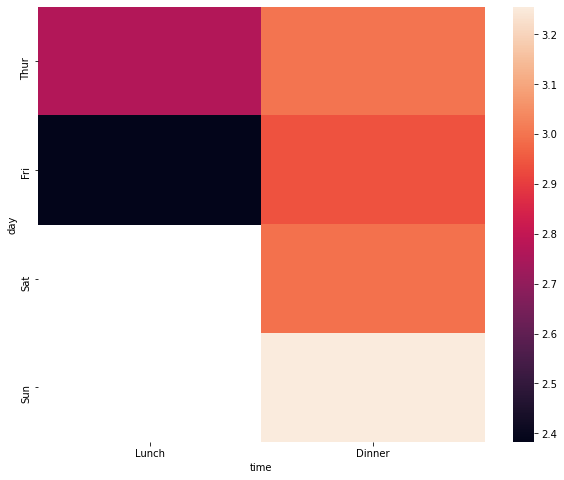

In [16]:
# heatmap 
fig,ax  =plt.subplots(figsize = (10,8)) 
sns.heatmap(pd.crosstab(df["day"], df["time"], values = df["tip"], aggfunc = "mean"))

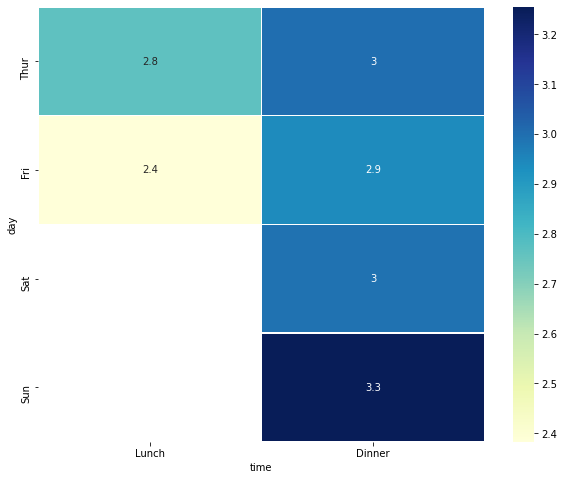

In [17]:
x= pd.crosstab(df["day"], df["time"], values = df["tip"], aggfunc = "mean")

fig,ax  =plt.subplots(figsize = (10,8)) 
sns.heatmap(x , annot = True , cmap = "YlGnBu", linewidths = .5)
plt.show()

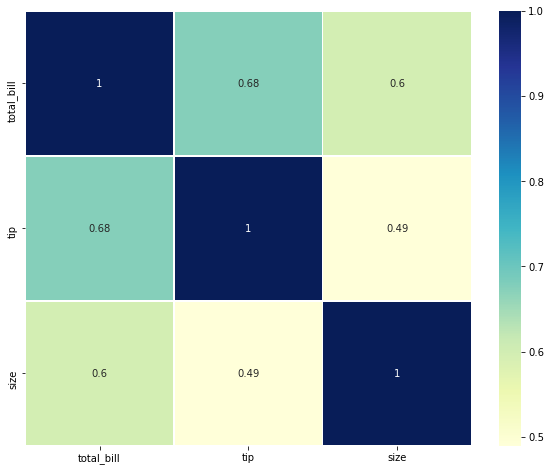

In [18]:
fig,ax  =plt.subplots(figsize = (10,8)) 
sns.heatmap(df.corr(), annot = True , cmap = "YlGnBu", linewidths = .5)
plt.show()

## Using FacetGrid, factorplot and lmplot

In [19]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

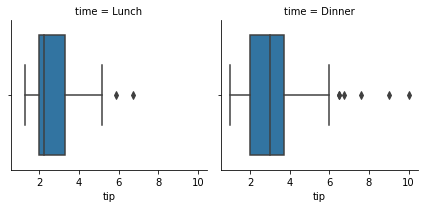

In [24]:
# FacetGrid  동일한 축과 축을 사용하여 여러플롯을 나란히 비교

g = sns.FacetGrid(df , col = "time")
g.map(sns.boxplot, 'tip')
plt.tight_layout()
plt.show()

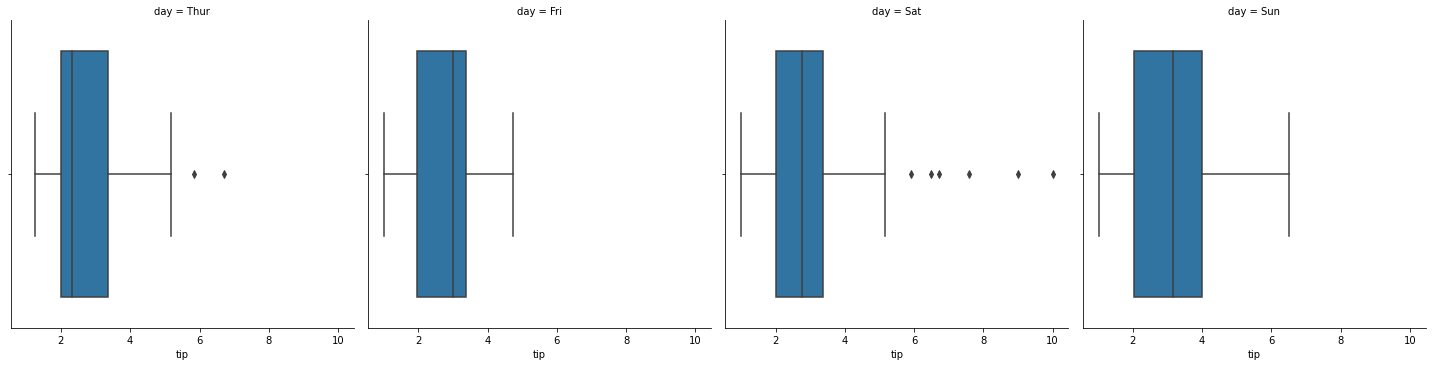

In [25]:
# factorplot은 facetgrid의 빠른 버전 
sns.factorplot(x= "tip", data = df , col = "day", kind = "box")

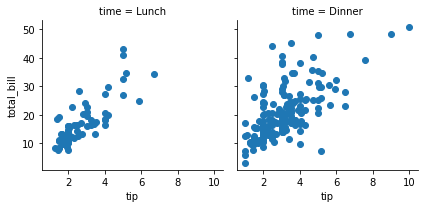

In [29]:
# FacetGrid는 matplotlib 지원 
g = sns.FacetGrid(df , col = "time")
g.map(plt.scatter, 'tip' , "total_bill")
plt.tight_layout()
plt.show()

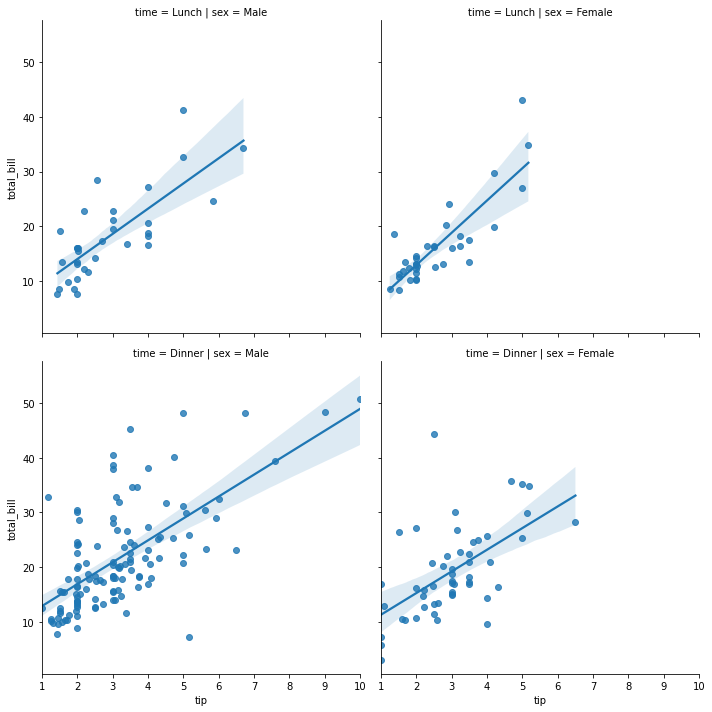

In [32]:
sns.lmplot(data = df , x = "tip", y = "total_bill", col = "sex" ,row = "time")
plt.tight_layout()
plt.show()

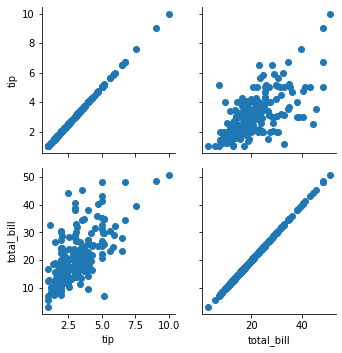

In [33]:
# PairGrid 행 및 열 매개변수를 정의하지 않고 그래프 생성
g = sns.PairGrid(df , vars = ["tip", "total_bill"])
g= g.map(plt.scatter)

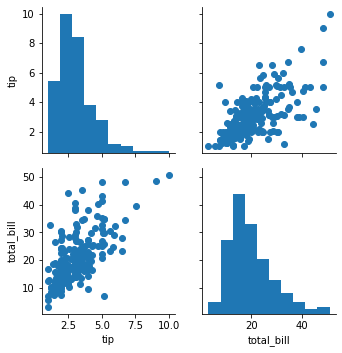

In [35]:
g = sns.PairGrid(df , vars = ["tip", "total_bill"])
g= g.map_offdiag(plt.scatter) # 주대각선 축 
g= g.map_diag(plt.hist)# 오른쪽 대각선 축 

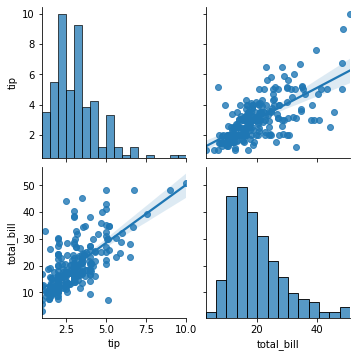

In [38]:
# pairplot
g = sns.pairplot(df , vars = ["tip", "total_bill"] , kind = "reg", diag_kind = "hist")

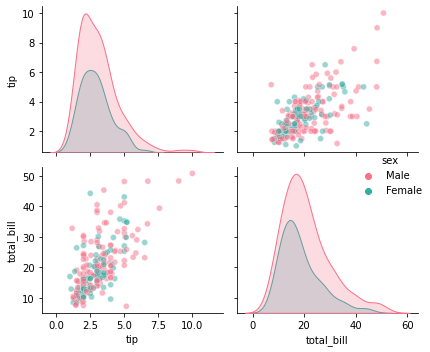

In [40]:
# customizimg pairplot 
sns.pairplot(df.query("tip > 1"), vars = ["tip", "total_bill"],
             hue = "sex", palette = "husl", plot_kws = {"alpha": 0.5})
plt.tight_layout()
plt.show()